## 6.01 - Supervised Learning Model Comparison

Recall the "data science process."

1. Define the problem.
2. Gather the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

In [1]:
import pandas as pd
import numpy as np

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [2]:
data_raw = pd.read_csv('401ksubs.csv')

In [3]:
df = data_raw.copy()

In [4]:
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [5]:
# Data Dictionary
'''
http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES
Contains data from 401ksubs.dta
  obs:         9,275                          
 vars:            11                          4 Sep 2001 13:50
 size:       231,875 (77.2% of memory free)
-------------------------------------------------------------------------------
              storage  display     value
variable name   type   format      label      variable label
-------------------------------------------------------------------------------
e401k           byte   %9.0g                  =1 if eligble for 401(k)
inc             float  %9.0g                  inc^2
marr            byte   %9.0g                  =1 if married
male            byte   %9.0g                  =1 if male respondent
age             byte   %9.0g                  age^2
fsize           byte   %9.0g                  family size
nettfa          float  %9.0g                  net total fin. assets, $1000
p401k           byte   %9.0g                  =1 if participate in 401(k)
pira            byte   %9.0g                  =1 if have IRA
incsq           float  %9.0g                  inc^2
agesq           int    %9.0g                  age^2
-------------------------------------------------------------------------------
Sorted by:  
''';

In [6]:
# Set up the datasets described in 'NOTE'

In [7]:
df_x_inc = df.drop(['e401k', 'p401k', 'pira', 'inc','incsq'], axis=1 )

In [8]:
df_y_inc = df['inc']

In [9]:
df_x_401k = df.drop('e401k', axis=1)

In [10]:
df_y_401k = df['e401k']

##### 2. What are 2-3 other variables that, if available, would be helpful to have?

In [11]:
# Using this as a source
# https://www.irs.gov/retirement-plans/plan-sponsor/401k-plan-qualification-requirements
# I am assuming the model is going to be used in the North American market

# the IRS website is so dense, I don't even know what they are saying here! I'm an Engineer~ heck

# Using another source:
# https://www.forusall.com/401k-blog/401k-eligibility/
# This one does a good job in explaining the jist but then offering their own service

# another: 
# https://www.employeefiduciary.com/blog/401k-eligibility-when-to-let-employees-join-your-401k-plan

# and another
# https://www.investopedia.com/articles/retirement/08/401k-info.asp

# Below, all of the information is compiled neatly into a few paragraphs and some reasoning

In [12]:
# I would think another attribute that is important for considering if someone is eligable for a 401k would be:

# Is the respondant at least X years old? (18, 19, 20, or 21) 
# Type: Bool
# Minimium Age Requirement
# Caveat, X cannot be higher than 21

# Has the respondant serviced X hours to the employer? (Minimium hours worked to be considered eligable) 
# Type: Bool
# Caveat: legally cannot be greater than 1 year for Safe Harbor
# Caveat: legally cannot be greater than 2 years for discretionary employer contributiuons

# Date that the respondant applied
# Type: Datetime Object
# Can be important if the employer has quarterly, semi annual, 
# annual enrollment dates for 401k for an automation system to report 401k application status



##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

This is very racist and gives data for discrimination and goes against the Civil Rights Act (1964)

# <u> **IT IS IS VERY ILLEGAL**</u>

## Civil Rights Act (1964), SEC. 2000e-2. [Section 703(h)]

>(h) Seniority or merit system; quantity or quality of production; 
>ability tests; compensation based on sex and authorized by minimum wage provisions

>Notwithstanding any other provision of this subchapter, it shall not be an
unlawful employment practice for an employer to apply different standards of compensation, or different terms, conditions, or privileges of employment pursuant to a bona fide seniority or merit system, or a system which measures earnings by quantity or quality of production or to employees who work in different locations, provided that such <u>**differences are not the result of an intention to discriminate because of race, color,**</u> religion, sex, or national origin, <u>**nor shall it be an unlawful employment practice for an employer to give and to act upon the results of any professionally developed ability test provided that such test, its administration or action upon the results is not designed, intended or used to discriminate because of race, color,**</u> religion, sex or national origin. It shall not be an unlawful employment practice under this subchapter for any employer to differentiate upon the basis of sex in determining the amount of the wages or compensation paid or to be paid to employees of such employer if such differentiation is authorized by the provisions of section 206(d) of Title 29 [section 6(d) of the Labor Standards Act of 1938, as amended].

## Civil Rights Act (1964) SEC. 2000e. [Section 701(k)]

>(k) The terms "because of sex" or "on the basis of sex" include, 
but are not limited to, because of or on the basis of pregnancy, childbirth, 
or related medical conditions; and women affected by pregnancy, 
childbirth, or related medical conditions <u>**shall be treated the same 
for all employment-­related purposes, including receipt of benefits under 
fringe benefit programs, as other persons not so affected but similar in their 
ability or inability to work, and nothing in section 2000e-2(h) of this title 
[section 703(h)]**</u> shall be interpreted to permit otherwise. 
This subsection shall not require an employer to pay for health insurance 
benefits for abortion, except where the life of the mother would be endangered 
if the fetus were carried to term, or except where medical complications have arisen 
from an abortion: Provided, That nothing herein shall preclude an employer from providing 
abortion benefits or otherwise affect bargaining agreements in regard to abortion.

## IRC 26 USC § 132(m)(1). Certain Fringe Benefits

* (1) In general
    * <u>**For purposes of this section, the term “qualified retirement planning services” means any retirement planning advice or information provided to an employee and his spouse by an employer maintaining a qualified employer plan.**</u>
* (2) Nondiscrimination rule
    * Subsection (a)(7) shall apply in the case of highly compensated employees only if such services are available on substantially the same terms to each member of the group of employees normally provided education and information regarding the employer’s qualified employer plan.
* (3) Qualified employer plan
    * <u>**For purposes of this subsection, the term “qualified employer plan” means a plan, contract, pension, or account described in section 219(g)(5).**</u>


## IRC 26 U.S. Code § 219(g)(5). Retirement Savings

* (5) Active participantFor purposes of this subsection, the term “active participant” means, with respect to any plan year, an individual—
    * (A) who is an active participant in—
        * (i) a plan described in section 401(a) which includes a trust exempt from tax under section 501(a),
        * (ii) an annuity plan described in section 403(a),
        * (iii) a plan established for its employees by the United States, by a State or political subdivision thereof, or by an agency or instrumentality of any of the foregoing,
        * (iv) an annuity contract described in section 403(b),
        * <u>**(v) a simplified employee pension (within the meaning of section 408(k)), or**</u>
        * (vi) any simple retirement account (within the meaning of section 408(p)), or
        
## IRC 26 U.S. Code § 408(k)(1). Individual retirement accounts
* (k) Simplified employee pension defined
    * (1) In general, For purposes of this title, <u>**the term “simplified employee pension” means an individual retirement account or individual retirement annuity—**</u>

## IRC 26 U.S. Code § 401(k). Cash or Deferred Payments
* (2) Qualified cash or deferred arrangement: A qualified cash or deferred arrangement is any arrangement which is part of a profit-sharing or stock bonus plan, a pre-ERISA money purchase plan, or a rural cooperative plan which meets the requirements of subsection (a)—
* (A) <u>**under which a covered employee may elect to have the employer make payments as contributions to a trust under the plan on behalf of the employee**</u>, or to the employee directly in cash;
* (B) **under which amounts held by the trust which are attributable to employer contributions made pursuant to the employee’s election—**
    * (i) may not be distributable to participants or other beneficiaries earlier than—
        * (I) severance from employment, death, or disability,
        * (II) an event described in paragraph (10),
        * (III) in the case of a profit-sharing or stock bonus plan, the attainment of age 59½,
        * (IV) subject to the provisions of paragraph (14), upon hardship of the employee,
        * (V) in the case of a qualified reservist distribution (as defined in section 72(t)(2)(G)(iii)), the date on which a period referred to in subclause (III) of such section begins, or
        * (VI) except as may be otherwise provided by regulations, with respect to amounts invested in a lifetime income investment (as defined in subsection (a)(38)(B)(ii)), the date that is 90 days prior to the date that such lifetime income investment may no longer be held as an investment option under the arrangement,
    * (ii) will not be distributable merely by reason of the completion of a stated period of participation or the lapse of a fixed number of years, and
    * (iii) except as may be otherwise provided by regulations, in the case of amounts described in clause (i)(VI), will be <u>**distributed only in the form of a qualified distribution (as defined in subsection (a)(38)(B)(i)) or a qualified plan distribution annuity contract (as defined in subsection (a)(38)(B)(iv)),**</u>
* (C) which provides that an employee’s right to his accrued benefit derived from employer contributions made to the trust pursuant to his election is nonforfeitable, and
* (D) which does not require, as a condition of participation in the arrangement, that an employee complete a period of service with the employer (or employers) maintaining the plan extending beyond the period permitted under section 410(a)(1) (determined without regard to subparagraph (B)(i) thereof).

A 401(k) can be defined as an *Employee-Sponsored Defined-Contribution Pension Account*
### References
Source 1: Civil Rights Act (1964)
https://www.eeoc.gov/statutes/title-vii-civil-rights-act-1964

Source 2: Fringe Benefit
https://www.irs.gov/pub/irs-tege/fringe_benefit_fslg.pdf

Source 3: 26 U.S. Code § 132(m)(1)
https://www.law.cornell.edu/uscode/text/26/132#m

Source 4: 26 U.S. Code § 401(k)
https://www.law.cornell.edu/uscode/text/26/401#k

Source 5: IRC 26 U.S. Code § 219(g)(5)
https://www.law.cornell.edu/uscode/text/26/219#g

Source 6: IRC 26 U.S. Code § 408(k)(1)
https://www.law.cornell.edu/uscode/text/26/408#k

In [13]:
# Personal note
# LAW is dense to understand, ugh

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

In [14]:
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [15]:
# I would stay from Family size, because the size of one's family does not dictate the amount of income. However, a larger family CAN encourage
# one to pursue a better income, but does not necessarly imply a relationship between family and income

# I can explore this later with a two tailed hypothesis test between family size and income

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

In [16]:
# Income Squared, Age Squared
# The SME may consider that income and age are the strongest indicators for 401(k) elibility

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

In [17]:
# Definition for 'inc' Data Dictionary labels it as 'inc^2'
# This is the square root of 'inc^2', and can be understood as the income of a respondant in units of $1000
# Justification:
# We can relate this column to the 'nettfa' column, which described the net total financial assets of a respondant in units of $1000

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

In [18]:
# Using this as a neat graphic:
# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [19]:
# Null Model
# choose the output as the average of all the contuinous numerical features
# if your model can't beat this, then big yikes

# Linear Regression
## Nice and simple, we know this. Consider the independent variables of X and fit to Y.
## Always a good place to start

# Lasso
# Least Absolute Shrinkage and selector operator
# Differing from LR, alters the modeling process to select a subset of the provided independent numerical features for use in the final model,
# instead of all of them. Forces the sum of the absolute value of the regression coefficents to be less than a fixed value, where some 
# coefficents of independent numerical features are forced to zero
# This chooses a simpler model which does not include these coefficents.
# This process automatically removes outlier datapoints in the independent numerical features
# Good to compare against

# Ridge
# Like Lasso, but coefficents of numerical features are reduced to reduce their effect on predicting the dependent numerical feature,
# so the result is a model which considers all the independent numerical features - but not as complex as a linear regression and 
# weighs some coefficents more heavily
# Good to compare against, would be interesting to see vs Lasso and see a simple model vs a weighted model

# ElasticNet
# Both Lasso and Ridge
# One or the other, let's try both!

# Support Vector Regression (SVR)
# Depends on a subset of the data, ignores data points that are beyond the margin (another outlier remover),
# fits a linear equation that deviates no more than the median, while trying to be as flat as possible
# In my experience, I have not found these successful for regression however I did not tune the hyperparameters

# Ensemble Regressor - Bagging
# Fits a linear regression to multiple sets of data sampled from the training data with replacement through a process called bootstrapping
# Averages out the collection of linear models into one which best represented the set
# Good for working with limited data

# Ensemble Regressor - Voting Regressor
# Combines many weak linear models into one stronger model by giving each model a weight
# can be good to experiment combining some of the earlier linear models like LR and Lasso into one regression workflow

# K Nearest Regressors
# Uses a classification technique for regression where interpolation is done on the nearest datapoints in the training set
# Tends to overfit

# Decison Tree Regressor
# Tends to overfit
# optimizes local criteria between optimal features and sorts training data into groups, tends to overfit

# Random Forest Regressor
# Like Extra Trees, but is an assortment of optimzied decision trees which optimize for local crtieria
# Is then averaged out 

# Extra Tree Regressor
# Makes a collection of decision tree regressors but each one is split at random instead of optimized local criteria - the collection of 
# trees are then averged out to control overfitting and bias


##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector regressor
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [20]:
# import linear estimators
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

# import structure and preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [21]:
'''
https://datascience.stackexchange.com/a/45932

StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. 
In short, it standardizes the data. Standardization is useful for data which has negative values. 
It arranges the data in a standard normal distribution. It is more useful in classification than regression. 
You can read this blog of mine.

Normalizer : It squeezes the data between 0 and 1. It performs normalization. 
Due to the decreased range and magnitude, the gradients in the training process do not 
explode and you do not get higher values of loss. Is more useful in regression than classification. Y
ou can read this blog of mine.
''';

In [22]:
# https://datascience.stackexchange.com/questions/45900/when-to-use-standard-scaler-and-when-normalizer
# This recommends to normalize data for linear regression
estimator_dict = {'lr': LinearRegression(normalize=True), # Normalize
                  'knn': KNeighborsRegressor(), # Standardize, because KNN uses a classification approach
                 'dtr': DecisionTreeRegressor(), # Don't Standardize, Don't normalize
                 'br': BaggingRegressor(), # Normalize
                 'rfr': RandomForestRegressor(), # Don't Standardize, Don't normalize
                 'abr': AdaBoostRegressor(), # normalize
                 'svr': SVR()} # Standardize, SVR uses a classification approach

In [23]:
def make_pipes(estimator_list):
    pipe_list = []
    for estimator in estimator_list.keys():
        if estimator in ['lr', 'svr','knn']:
            #standardize
            pipe_list.append(make_pipeline(StandardScaler(), estimator_list.get(estimator)))
        if estimator in ['br', 'abr', 'lr',]:
             # normalize
            pipe_list.append(make_pipeline(Normalizer(), estimator_list.get(estimator)))
        else:
            pipe_list.append(estimator_list.get(estimator))
    return dict(zip(estimator_list.keys(),pipe_list))
        

In [24]:
pipe_dict = make_pipes(estimator_dict)

In [25]:
pipe_dict

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearregression', LinearRegression(normalize=True))]),
 'knn': Pipeline(steps=[('normalizer', Normalizer()),
                 ('linearregression', LinearRegression(normalize=True))]),
 'dtr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsregressor', KNeighborsRegressor())]),
 'br': KNeighborsRegressor(),
 'rfr': DecisionTreeRegressor(),
 'abr': Pipeline(steps=[('normalizer', Normalizer()),
                 ('baggingregressor', BaggingRegressor())]),
 'svr': RandomForestRegressor()}

In [26]:
[(i,j) for i,j in pipe_dict.items()]

[('lr',
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('linearregression', LinearRegression(normalize=True))])),
 ('knn',
  Pipeline(steps=[('normalizer', Normalizer()),
                  ('linearregression', LinearRegression(normalize=True))])),
 ('dtr',
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('kneighborsregressor', KNeighborsRegressor())])),
 ('br', KNeighborsRegressor()),
 ('rfr', DecisionTreeRegressor()),
 ('abr',
  Pipeline(steps=[('normalizer', Normalizer()),
                  ('baggingregressor', BaggingRegressor())])),
 ('svr', RandomForestRegressor())]

In [27]:
# Let's bring back the dataframes we set up0 for this regression problem to predict inc

In [28]:
df_x_inc.head()

,marr,male,age,fsize,nettfa,agesq
0,0,0,40,1,4.575,1600
1,0,1,35,1,154.000,1225
2,1,0,44,2,0.000,1936
3,1,1,44,2,21.800,1936
4,0,0,53,1,18.450,2809


In [29]:
df_y_inc.head()

0    13.170
1    61.230
2    12.858
3    98.880
4    22.614
Name: inc, dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_x_inc, df_y_inc)

In [31]:
def evaluate_pipes(pipe_dict, X, y):
    import datetime as dt
    fitted_object = []
    for (name, pipe) in pipe_dict.items():
        # time
        time_start = dt.datetime.now()
        # Fit
        pipe.fit(X_train, y_train)
        fitted_object.append(pipe)
        # Score
        train_score = pipe.score(X_train, y_train)
        test_score = pipe.score(X_test, y_test)
        time_done = dt.datetime.now()
        print(f'  Estimator: {name}\nTrain Score: {train_score}, \n Test Score: {test_score} \n Time Taken: {time_done-time_start}')
    return dict(zip(pipe_dict.keys(),fitted_object))

In [32]:
from sklearn.dummy import DummyRegressor

In [33]:
# Let's check Nulls real quick
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
train_score = dummy.score(X_train, y_train)
test_score = dummy.score(X_test, y_test)
print(f'  Estimator: Dummy\nTrain Score: {train_score}, \n Test Score: {test_score} \n ')

  Estimator: Dummy
Train Score: 0.0, 
 Test Score: -1.4994481365437906e-06 
 


In [34]:
dummy.predict(X_test)

array([39.24749684, 39.24749684, 39.24749684, ..., 39.24749684,
       39.24749684, 39.24749684])

In [35]:
y_test.mean()

39.27607028891764

In [36]:
# For regression, accuracy scores don't mean much, but it's still good habit to include them in your workflow

In [37]:
fitted_objects = evaluate_pipes(pipe_dict, X_train, y_train)

  Estimator: lr
Train Score: 0.28560137991583234, 
 Test Score: 0.29565593260671397 
 Time Taken: 0:00:00.022676
  Estimator: knn
Train Score: 0.27444926759781907, 
 Test Score: 0.2687702910219706 
 Time Taken: 0:00:00.015254
  Estimator: dtr
Train Score: 0.5359218856380821, 
 Test Score: 0.29435014684877303 
 Time Taken: 0:00:00.173937
  Estimator: br
Train Score: 0.48716682864194427, 
 Test Score: 0.23885820128116098 
 Time Taken: 0:00:00.080101
  Estimator: rfr
Train Score: 0.9918090375505916, 
 Test Score: -0.2431166616552376 
 Time Taken: 0:00:00.043716
  Estimator: abr
Train Score: 0.8675747494973374, 
 Test Score: 0.25229152001495936 
 Time Taken: 0:00:00.422388
  Estimator: svr
Train Score: 0.8961790609845686, 
 Test Score: 0.3062689164071001 
 Time Taken: 0:00:02.545992


In [38]:
# They all did very well. I don't know how to feel, but I do feel confident in the standardization/normalization approach i took

##### 9. What is bootstrapping?

In [39]:
# Treat a training dataset as a population
# Create a set of sampled data from the population with replacement
# Eg: Training Dataset: [1, 2, 3, 4, 5]
# One Bagged Sample: [ 1, 2, 2, 4, 5]
# Bootstrapping, doing this process many times

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

In [40]:
# A decision tree fits the data into groups, optimizing at each node

# a set of bagged decision trees creates a set of bagged samples (bootstrapping), fits each bagged sample to a decision tree
# returns the average of all the decision trees

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

In [41]:
# A bagged decision tree optimzes at each node
# returns the average of all the decision trees that have optimized nodes

# A random forest chooses the split at each node randomly for each bagged sample
# returns the average of all the decision trees with nodes that are randomly split

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

In [42]:
# Adding randomization to decision tree nodes fights the inherent bias in locally fitting nodes

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mean_squared_error

<function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)>

In [45]:
def evaluate_rsme(fitted_dist, x_train, x_test, y_train, y_test):
    train_preds = []
    test_preds = []
    train_rsme = []
    test_rsme = []
    for (name, fitted) in fitted_dist.items():
        train_pred = fitted.predict(x_train)
        train_preds.append(train_pred)
        
        test_pred = fitted.predict(x_test)
        test_preds.append(test_pred)
        
        train_error = mean_squared_error(y_train, train_pred, squared=False)
        test_error = mean_squared_error(y_test, test_pred, squared=False)
        train_rsme.append(train_error)
        test_rsme.append(test_error)
        print(f'Object: {name}\nTrain RSME: {train_error}\nTest RSME: {test_error}')
    return [fitted_dist.keys(), train_rsme, test_rsme], (train_preds, test_preds)

In [46]:
# Let's calculate Null RSME
mean_squared_error(df_y_inc, np.ones(len(df_y_inc)) *df_y_inc.mean())

580.2656337048445

In [47]:
rsme, preds = evaluate_rsme(fitted_objects, X_train, X_test, y_train, y_test)

Object: lr
Train RSME: 20746.000748591352
Test RSME: 20716.979911479724
Object: knn
Train RSME: 20.728346949000958
Test RSME: 19.953721005163043
Object: dtr
Train RSME: 30.275720135716185
Test RSME: 29.62546852630208
Object: br
Train RSME: 17.426847515396034
Test RSME: 20.357749575372814
Object: rfr
Train RSME: 2.202410375175901
Test RSME: 26.016742904241266
Object: abr
Train RSME: 8.855563026924942
Test RSME: 20.17730387734416
Object: svr
Train RSME: 7.841032484266488
Test RSME: 19.435358622001726


In [48]:
rsme[0]

dict_keys(['lr', 'knn', 'dtr', 'br', 'rfr', 'abr', 'svr'])

In [49]:
df_rsme = pd.DataFrame([rsme[1], rsme[2]] , index=['RSME Train', 'RSME Test'], columns=list(rsme[0]))

In [50]:
df_rsme = df_rsme.T

In [51]:
df_rsme = df_rsme.sort_values(by='RSME Test', ascending=True).round(10)

In [52]:
df_rsme['RSME Train - Test'] = df_rsme['RSME Train'] - df_rsme['RSME Test']

In [53]:
df_rsme

,RSME Train,RSME Test,RSME Train - Test
svr,7.841032,19.435359,-11.594326
knn,20.728347,19.953721,0.774626
abr,8.855563,20.177304,-11.321741
br,17.426848,20.357750,-2.930902
rfr,2.202410,26.016743,-23.814333
dtr,30.275720,29.625469,0.650252
lr,20746.000749,20716.979911,29.020837


##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

In [54]:
# Engineered Column can quickly give us information
# Anything with a negative value, the model overfitted, the larger the negative differnce the larger the overfit

# Anything with a positive value the model was able to generalize, the larger the positive differende the higher the learned relationships

# However, this is in relation to each model when comparing overfitting. Refer to the Test RSME score for how the model learned the 
# relationships of the independent features to the predictor features

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [55]:
# I would Choose the AdaBoostedRegressor Model for the regression problem
# There is slight overfitting with the training data but out of all the evaluated models
# It has the lowest test RSME and may have best learned the relationships between the independent numerical features and the predictor

# To improve on this, I would most likely include abr into a ensemble voter and include another estimator such as knn to combat the overfitting
# with more variance

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [56]:
# I would preform a quick gridcv search over 3 kinds of values:
# much smaller than default, default, much larger than default

# Then I would evaluate RSME for all possible estmators and visually identify a trend for where RSME is lowest
# Then gridsearch CV over the identified range where RSME was calculated lowest

# There is most likely a way to optimize this process, like stochastic gradient descent? I don't know yet

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

In [57]:
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [58]:
df_x_401k.head()

,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [59]:
df_y_401k.head()

0    0
1    1
2    0
3    0
4    0
Name: e401k, dtype: int64

In [60]:
# p401k is a variable which states if a customer already has a 401k, possibly with a previous employer
# This won't mean much for our eligibility terms. 

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

In [61]:
# Null model
# choose the most often, if a model can't beat this then all your work is for nothing

# Logistic Regression
# Baseline for classification, extremely fast

# K Nearest Neighbors Classification
# most computationally difficult
# tends to classify well

# Decision Tree Classifier
# Overfits, classic tree. baseline before going to random, extra or bagged trees

# Bagged Classifier
# Combats Decision tree overfitting
# takes random samples of data and trains decision trees on each set, all are averaged out

# Random Forest Classifier
# Combats decision overfitting with random splits and random samples of data

# Adaboost classifier
# Adjusts model based on incorrectly classified predictions
# Preformed great for regression; let's see for classification !

# Support Vector Classification
# Like KNN and classifies based on data clustering, would use to compare with KNN

# Multinominal Naive Bayes
# Choose the classification with the highest probability of being correct
# might be wrong a few times, because model did not fit correctly and all predictions are around 30 %

# Ensemble Classifiers - Bagging
# combine a bunch of lower preforming ones
# if we find out that the ones above don't do too well, let's try putting them together

# Ensemble Classifier - Voting Classifier
# combine a bunch of lower preforming ones
# if we find out that the ones above don't do too well, let's try putting them together
# same idea as bagging, but now each model is weighted to how much it contributes to the prediction

# Extra trees classifier
# random splits, random sets of data, random random random
# combat overfitting

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector classifier
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

In [63]:
# This is here for reference
'''
# https://datascience.stackexchange.com/questions/45900/when-to-use-standard-scaler-and-when-normalizer
# This recommends to normalize data for linear regression
estimator_dict = {'lr': LinearRegression(normalize=True),
                  'knn': KNeighborsRegressor(), # Standardize, because KNN uses a classification approach
                 'dtr': DecisionTreeRegressor(), # Don't Standardize, Don't normalize
                 'br': BaggingRegressor(), # Normalize
                 'rfr': RandomForestRegressor(), # Don't Standardize, Don't normalize
                 'abr': AdaBoostRegressor(), # normalize
                 'svr': SVR()} # Standardize, SVR uses a classification approach
''';

In [64]:
# Refering to how I chose the kinds of preprocessing, I'll do the same here

dict_estimators_c = {
    'logr': LogisticRegression(), # Regression style, normalize
    'knn': KNeighborsClassifier(), # distance, standardize
    'dtc': DecisionTreeClassifier(), # Tree, Don't normalize, don't standardize
    'bc': BaggingClassifier(), #  Don't normalize, don't standardize
    'rfc': RandomForestClassifier(), # Tree, Don't normalize, don't standardize
    'abc': AdaBoostClassifier(), # Don't normalize, don't standardize
    'svc': SVC() # Regression style, standardize
}

In [65]:
def make_pipes_c(estimator_dict):
    '''
    Make Classifer pipe with their associated keys
    '''
    pipe_list = []
    for estimator in estimator_dict.keys():
        if estimator in ['svc','knn',]:
            #standardize
            pipe_list.append(make_pipeline(StandardScaler(), estimator_dict.get(estimator)))
        if estimator in ['logr', 'br', 'abr']:
             # normalize
            pipe_list.append(make_pipeline(Normalizer(), estimator_dict.get(estimator)))
        else:
            pipe_list.append(estimator_dict.get(estimator))
    return dict(zip(estimator_dict.keys(),pipe_list))

In [66]:
fit_pipes_c = make_pipes_c(dict_estimators_c)

In [67]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_x_401k, df_y_401k, stratify=df_y_401k)

In [68]:
# Let's look at classification accuracy
df_y_401k.value_counts(normalize=True)

0    0.607871
1    0.392129
Name: e401k, dtype: float64

In [69]:
#reusing the evaulate function from before

fitted_pipes_c = evaluate_pipes(fit_pipes_c, X_train, y_train)

  Estimator: logr
Train Score: 0.6362852213916044, 
 Test Score: 0.6451056489866321 
 Time Taken: 0:00:00.058082
  Estimator: knn
Train Score: 0.8930419781483612, 
 Test Score: 0.8740836567485986 
 Time Taken: 0:00:00.799445
  Estimator: dtc
Train Score: 0.7384991374353076, 
 Test Score: 0.6149202242345839 
 Time Taken: 0:00:00.569569
  Estimator: bc
Train Score: 1.0, 
 Test Score: 0.8012074169900819 
 Time Taken: 0:00:00.057615
  Estimator: rfc
Train Score: 0.9826049453709028, 
 Test Score: 0.8745148771021992 
 Time Taken: 0:00:00.379440
  Estimator: abc
Train Score: 0.9998562392179413, 
 Test Score: 0.8852953859422165 
 Time Taken: 0:00:01.375256
  Estimator: svc
Train Score: 0.8816848763657275, 
 Test Score: 0.8917636912462268 
 Time Taken: 0:00:00.482970


In [70]:
# quickly looking at the accuracy scores, I would probably choose SVC to optimize
# our logistic barely did better than the null model

## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

In [71]:
# A false positive would be a respondant who is NOT eligable for 401(k) enrollment but was notified that they were
# A false negative would be a respondant who is eligible for 401(k) enrollment but was NOT notified

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

In [72]:
# Minimize false negatives. These are in violation of the law and could be grounds for a worker's compensation case
# We would rather have false positives and handle them manually. 

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

In [73]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics
# To optimize for false negatives, we would maximize recall score, to find all the positives
# in this case, we would be biased at finding all respondants who would qualify for a 401(k)()

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

In [74]:
# https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/#:~:text=Recall (Sensitivity) - Recall is,observations in actual class - yes.&text=F1 score - F1 Score is,and false negatives into account.

# f1 takes the weighted average of precision and recall.
# This is especially important for classification problems with uneven classes (much like ours with a 60 % representation of No)

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [75]:
from sklearn.metrics import f1_score

In [76]:
for name, fitted_classifier in list(fitted_pipes_c.items()):
    traing_score_c = f1_score(y_train, fitted_classifier.predict(X_train))
    test_score_c = f1_score(y_test, fitted_classifier.predict(X_test))
    print(f'F1-Scores: {name}\nTrain: {traing_score_c}\nTest: {test_score_c}')

F1-Scores: logr
Train: 0.47748864105741423
Test: 0.5027190332326283
F1-Scores: knn
Train: 0.0
Test: 0.0
F1-Scores: dtc
Train: 0.6404427752520261
Test: 0.47002967359050446
F1-Scores: bc
Train: 1.0
Test: 0.7538707955152162
F1-Scores: rfc
Train: 0.9773365798838735
Test: 0.8224527150701648
F1-Scores: abc
Train: 0.9998166819431714
Test: 0.83375
F1-Scores: svc
Train: 0.8224379719525351
Test: 0.8406349206349206


In [77]:
# I do not understand how KNN got a score of 0, worst possible score

##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

In [78]:
# YES
# KNN is overfit too far, running predictions on the instance

In [79]:
fitted_pipes_c.get('knn').score(X_test, y_test)

0.6080206985769728

In [80]:
f1_score(y_test, fitted_pipes_c.get('knn').predict(X_test))

0.0

In [81]:
# Decision Tree overfit
# Bagged Classifier overfit, almost by 14 %
# Random forest overfit by 10%
# AdaBoost overfit by 12 %
# SVC has a lowish score, but gives evidence that it learned to make decisions with an 80 % accuracy

In [82]:
# RSME baseline, for fun
mean_squared_error(df_y_401k, np.ones(len(df_y_401k)) * df_y_401k.mean())

0.2383639293524458

In [83]:
# for fun
rsme_c, preds_c = evaluate_rsme(fitted_pipes_c, X_train, X_test, y_train, y_test)

Object: logr
Train RSME: 0.6030877039107957
Test RSME: 0.595730099133297
Object: knn
Train RSME: 0.6262422961250774
Test RSME: 0.6260825036870358
Object: dtc
Train RSME: 0.5113715504060549
Test RSME: 0.6205479641135052
Object: bc
Train RSME: 0.0
Test RSME: 0.4458616186777216
Object: rfc
Train RSME: 0.1318903128705713
Test RSME: 0.3542387936093403
Object: abc
Train RSME: 0.011990028442779207
Test RSME: 0.33868069631702297
Object: svc
Train RSME: 0.3439696551067733
Test RSME: 0.32899287036921204


##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

In [84]:
# For this dataset, I would choose a Support Vector Machine to estimate and predict values for these problem cases
# Let's look at a few graphs

In [85]:
df_rsme

,RSME Train,RSME Test,RSME Train - Test
svr,7.841032,19.435359,-11.594326
knn,20.728347,19.953721,0.774626
abr,8.855563,20.177304,-11.321741
br,17.426848,20.357750,-2.930902
rfr,2.202410,26.016743,-23.814333
dtr,30.275720,29.625469,0.650252
lr,20746.000749,20716.979911,29.020837


In [86]:
df_rsme_c = pd.DataFrame([rsme_c[1], rsme_c[2]] , index=['RSME Train', 'RSME Test'], columns=list(rsme_c[0]))
df_rsme_c = df_rsme_c.T
df_rsme_c

,RSME Train,RSME Test
logr,0.603088,0.595730
knn,0.626242,0.626083
dtc,0.511372,0.620548
bc,0.000000,0.445862
rfc,0.131890,0.354239
abc,0.011990,0.338681
svc,0.343970,0.328993


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Regression RSME - drop Linear, KNN, AdaBoost')

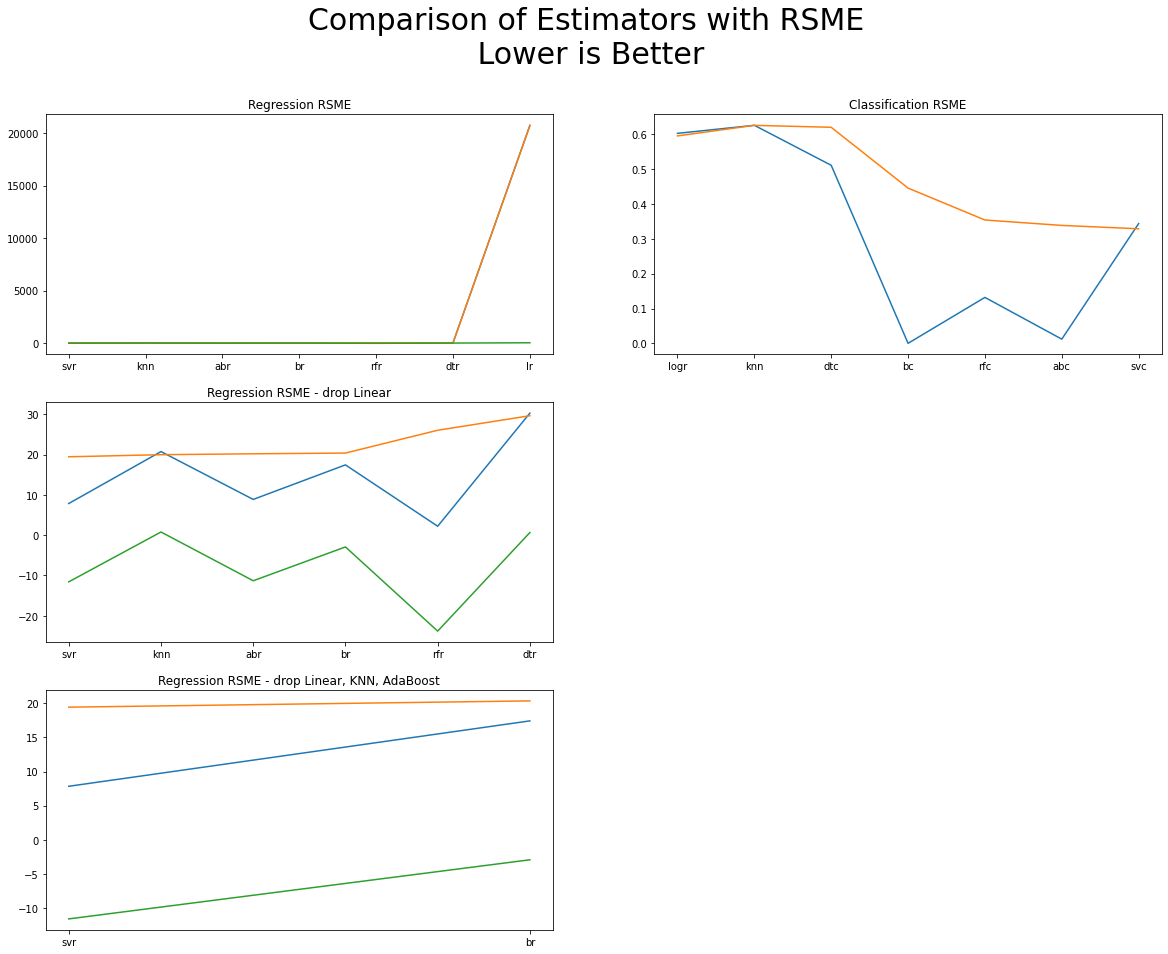

In [92]:
plt.figure(figsize=(20, 15))
plt.suptitle('Comparison of Estimators with RSME\n Lower is Better', fontsize=30)
plt.subplot(3,2,1)
plt.plot(df_rsme)
plt.title('Regression RSME')
plt.subplot(3,2,2)
plt.plot(df_rsme_c)
plt.title('Classification RSME')
plt.subplot(3,2,3)
plt.plot(df_rsme.drop('lr', axis=0))
plt.title('Regression RSME - drop Linear')
plt.subplot(3,2,5)
plt.plot(df_rsme.drop(['lr','knn','abr', 'rfr','dtr'], axis=0))
plt.title('Regression RSME - drop Linear, KNN, AdaBoost')

In [89]:
# For Regression, SVR is the lowest
# For classification, SVC learned the most with having the lowest RSME and weak evidence of overfitting

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

In [90]:
# for a Support Vector Machine
# I would go ahead and like above, conduct a gird search on the two SVMs, choose a very low value, default, and then a very high value for
# the parameters to identify a trend then start working on finalizing a production model

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

In [91]:
pd.DataFrame(fitted_objects.get('svr').feature_importances_, index=df_x_inc.columns, columns=['Importance']).sort_values(by='Importance', ascending=False).round(5)

,Importance
nettfa,0.59748
marr,0.10486
age,0.10393
agesq,0.10175
fsize,0.06840
male,0.02358


In [93]:
# nettfa: net total fin. assets, $1000
# This indidcator is the strongest with a 59 % importance in predicting the respondant's income
# This suggests that money makes money

In [97]:
pd.DataFrame(fitted_pipes_c.get('svc').feature_importances_, index=df_x_401k.columns, columns=['Importance']).sort_values(by='Importance', ascending=False).round(5)

,Importance
nettfa,0.36
inc,0.22
incsq,0.18
age,0.08
fsize,0.06
agesq,0.04
marr,0.02
p401k,0.02
pira,0.02
male,0.00


In [98]:
# For Classification, 
# nettfa: net total fin. assets, $1000
# Has the strongest indication if a respondant is eligable for 401(k) enrollment